In [1]:
#Import everything
import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import fcsparser

import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import ternary
from scipy.stats import multinomial

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import index_haps as idh
import index_flow as idf

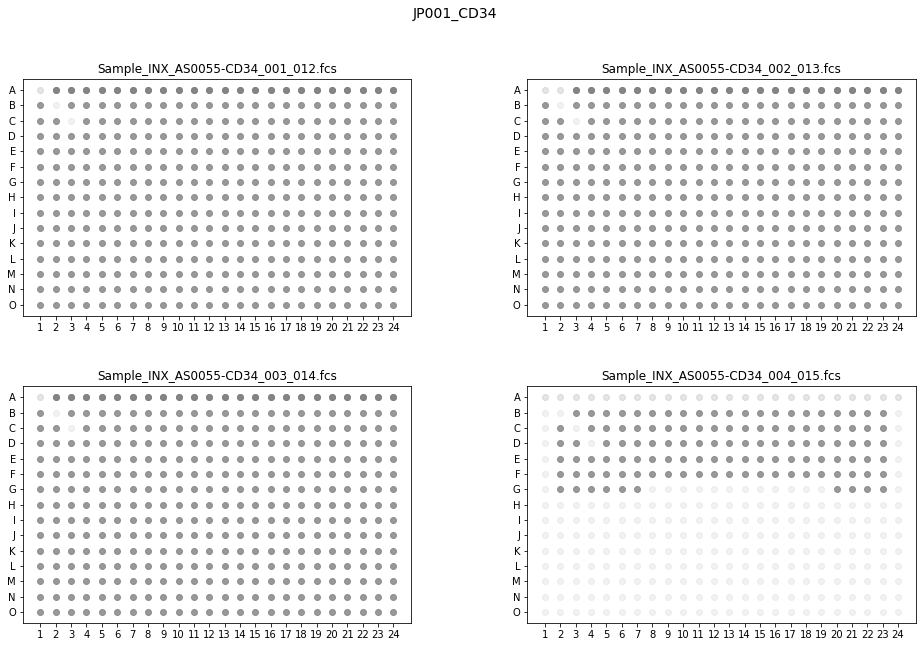

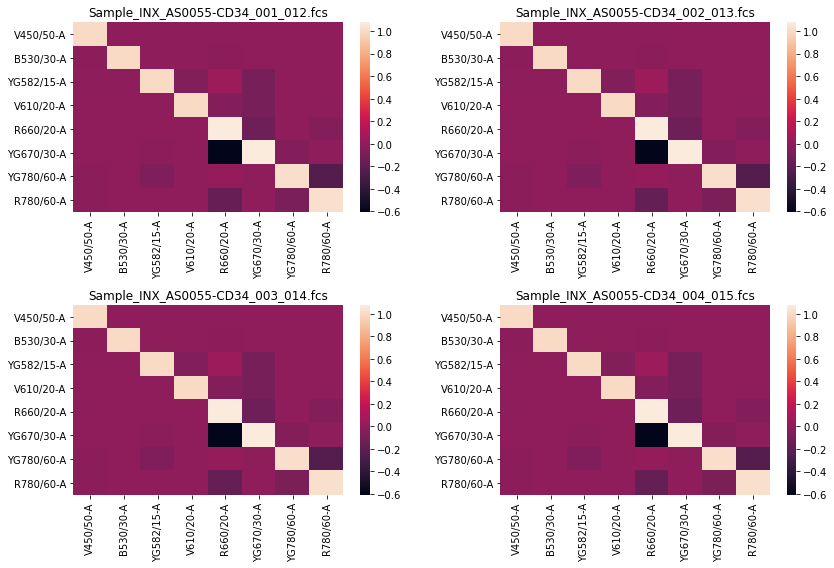

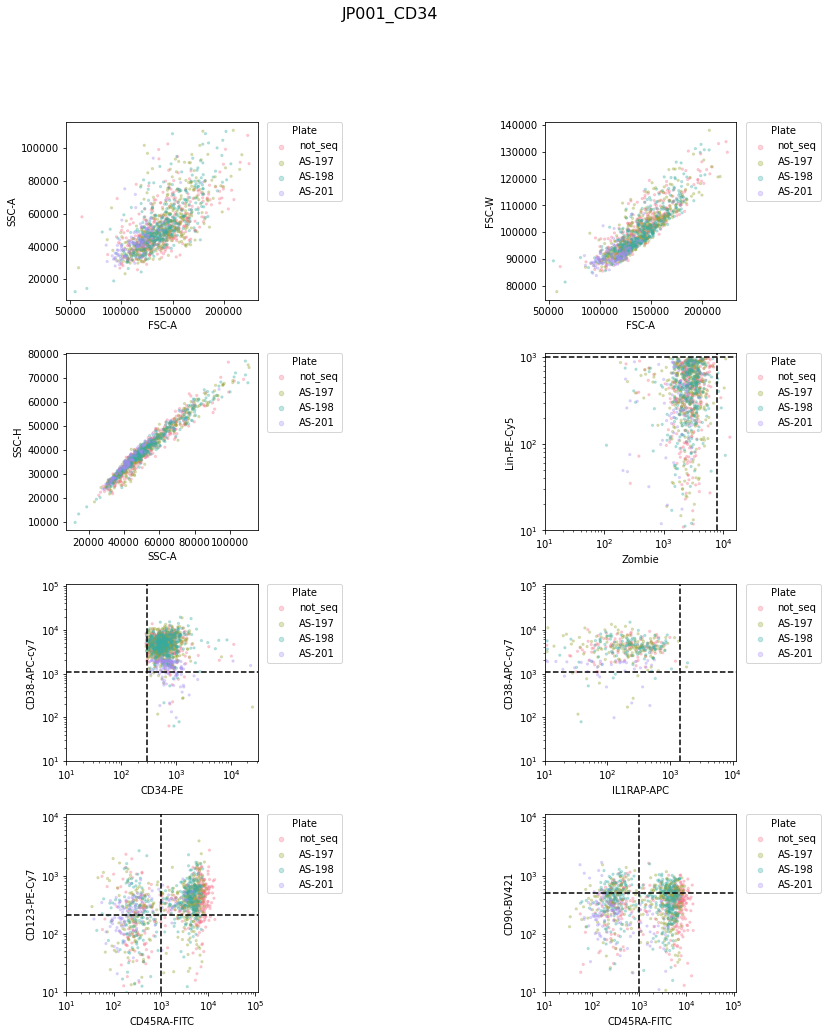

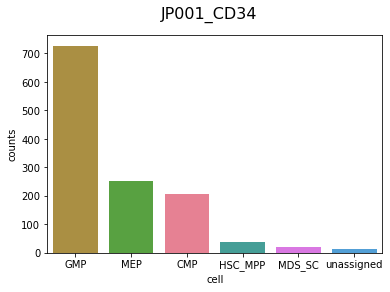

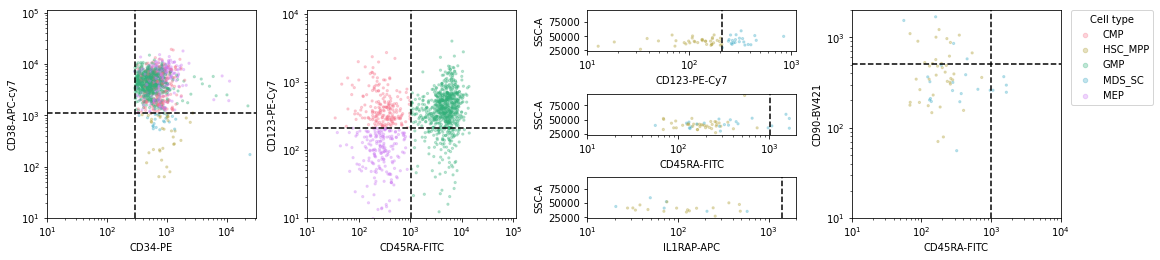

In [2]:
#JP001 CD34 parameters

directory = '../Data/JP001_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
plate_key = {'Sample_INX_AS0055-CD34_001_012.fcs': 'not_seq',
             'Sample_INX_AS0055-CD34_002_013.fcs': 'AS-197',
             'Sample_INX_AS0055-CD34_003_014.fcs': 'AS-198',
             'Sample_INX_AS0055-CD34_004_015.fcs': 'AS-201'
            }

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
 
gates = {
    'Lin-PE-Cy5': 1000,
    'CD34-PE': 280 ,
    'CD38-APC-cy7': 1100 ,  #Originally 2500, have adjusted to 1100 as per AS calculation for lowest 10%. 1300 ~15%. This is compatible with FlowJo analysis on total MNC
    'CD45RA-FITC': 1000 ,
    'CD123-PE-Cy7': 200,
    'Zombie': 8000,
    'IL1RAP-APC': 1400,  #set from FlowJo looking at FMOs
    'CD90-BV421': 500,
}



label = 'JP001_CD34'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
idf.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = idf.MDS_BM_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = False, save = False)
idf.flowplot_bycelltype_gating(CD34assigned, logs, gates,  label, plot = True, save = True)

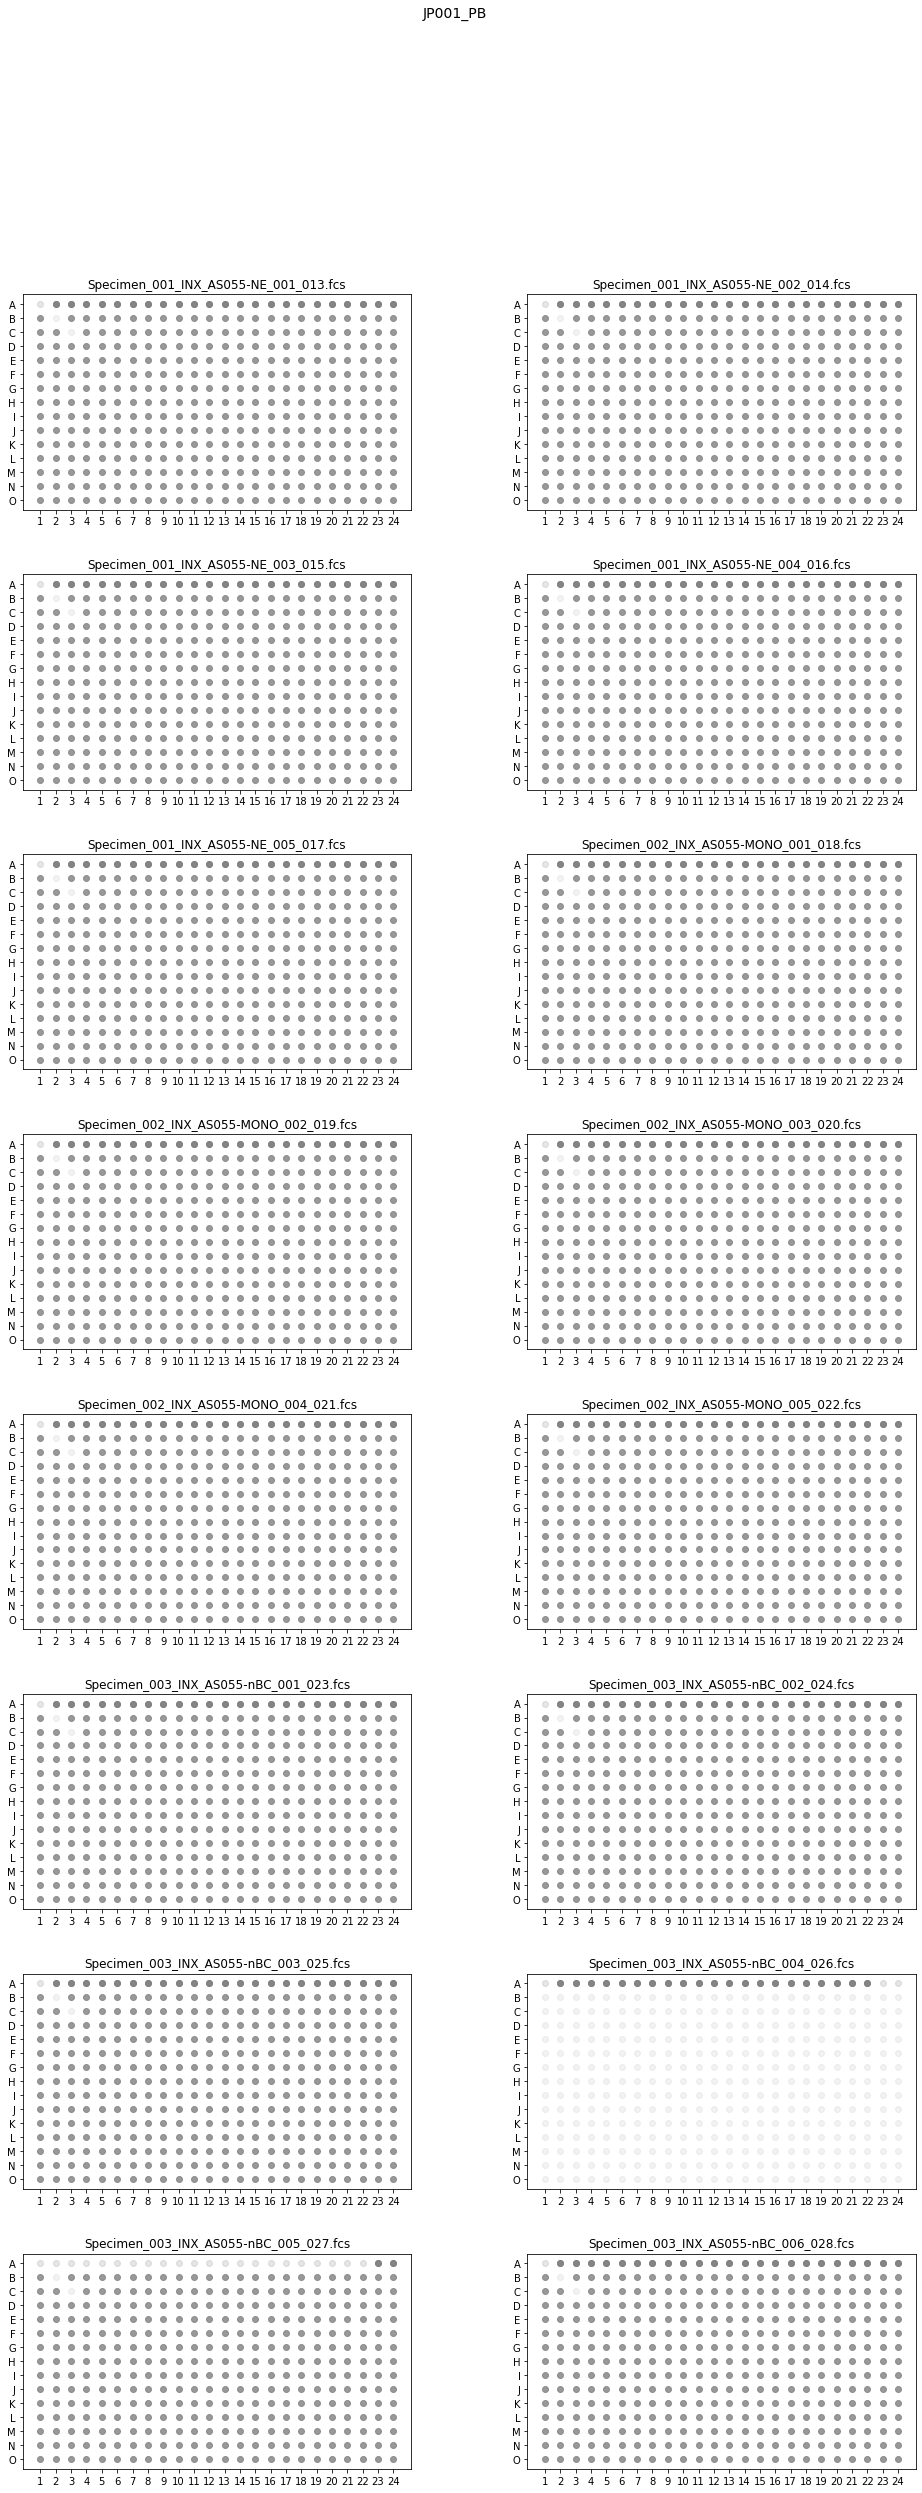

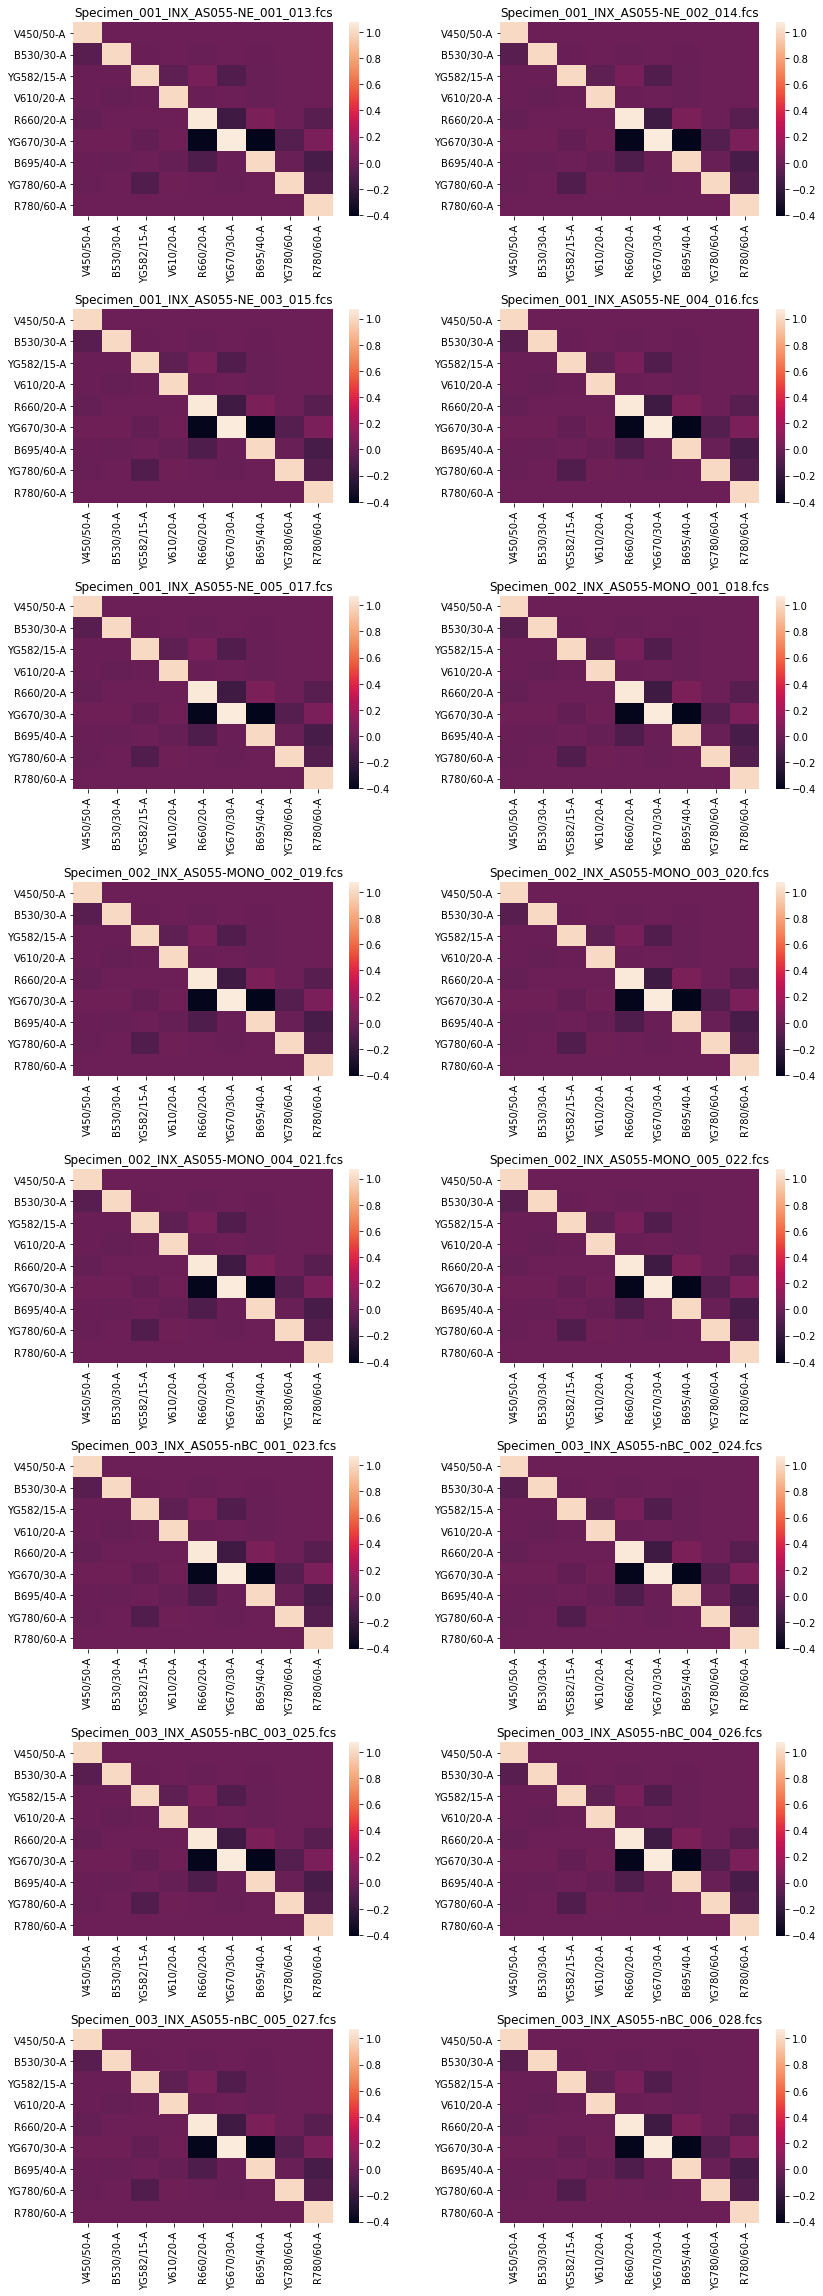

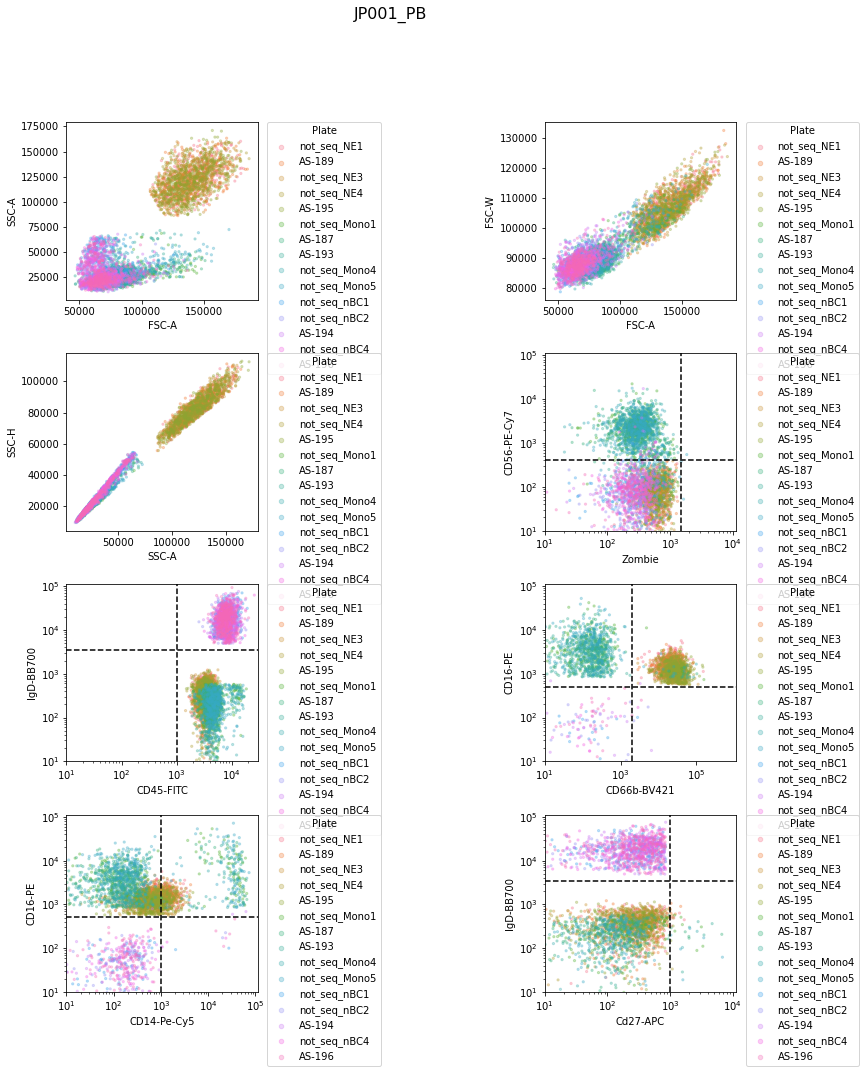

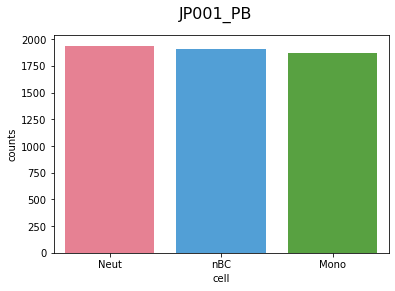

In [3]:
#JP001 PB parameters

directory = '../Data/JP001_PB/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)


plates = ['not_seq_NE1','AS-189','not_seq_NE3','not_seq_NE4','AS-195','not_seq_Mono1','AS-187','AS-193','not_seq_Mono4','not_seq_Mono5','not_seq_nBC1','not_seq_nBC2','AS-194','not_seq_nBC4a','not_seq_nBC4','AS-196']

plate_key = dict(zip(files, plates))

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 500,
    'CD14-Pe-Cy5': 1000 ,
    'CD56-PE-Cy7': 400 ,
    'CD66b-BV421': 2000 ,
    'Zombie': 1500,
    'CD45-FITC': 1000,
    'Cd27-APC': 1000,
    'IgD-BB700': 3500,
    'R780/60-A':1000
}

label = 'JP001_PB'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)

#Need to rename placeholder plate not_seq_nBC4a, and reassign Plate_Well column
source['Plate'] = source['Plate'].replace({'not_seq_nBC4a':'not_seq_nBC4'})
source['Plate_Well'] = source['Plate'].astype(str) + '_' + source['Well'].astype(str)
idf.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = idf.PB_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = False, save = False)

In [4]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1259) = ', len(CD34assigned))
print('Number of PB wells (expect 5715) = ',len(PBassigned))
JP001_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(JP001_allcells_assigned))

Number of CD34 wells (expect 1259) =  1259
Number of PB wells (expect 5715) =  5715
Total number of wells =  6974


In [5]:
# import importlib
# importlib.reload(idh)

JP001_4
Cells with 10 reads for 4 genes =  2513
JP001_4


C:\Users\z3283497\python\Annatina\MDS_amplicons\Code\index_haps.py:475: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 1)


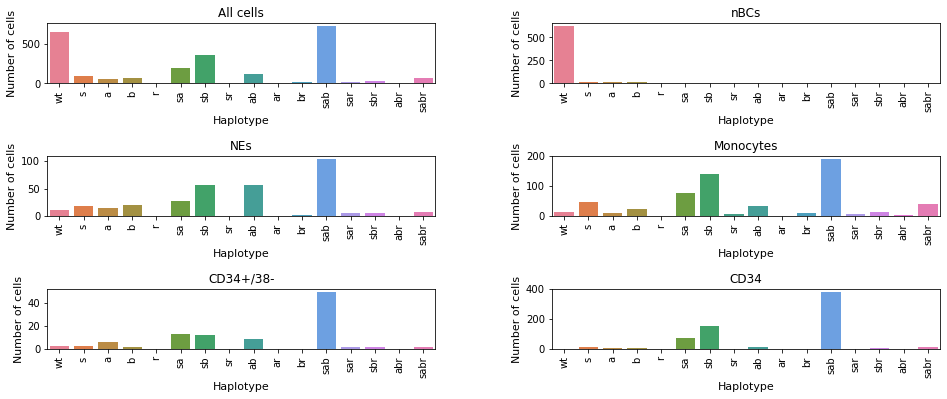

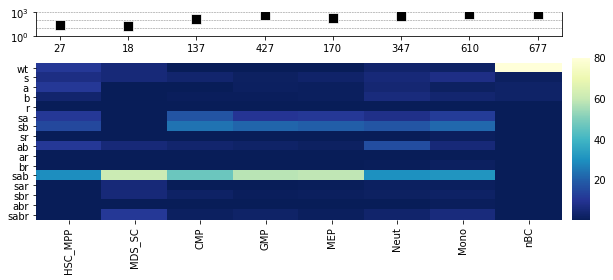

In [6]:
#And assign haplotypes
datafile = '../Data/Amp_data/clean_anon_allele_counts_resc_2.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'JP001'
haps = 4
reads = 10
cutoff = 0.2
JP001_plate = idh.data_retrieval2(datafile, metadata, pt_id)
JP001_haps = idh.call_haps(JP001_plate, metadata, pt_id, haps, reads, cutoff) #hap number, read cut, proprtion mutated
JP001_haps_indexed = pd.merge(JP001_haps, JP001_allcells_assigned, on = 'Plate_Well')
idh.plot_hap_dist_sort_type(JP001_haps_indexed, pt_id, haps, reads, cutoff, save = True)
cell_number = idh.plot_index_heatmap_3(JP001_haps_indexed, pt_id, haps, reads, cutoff, save = True)

In [7]:
#Piecharts for figure 2
#Cell counts permitted haplotypes
cc = cell_number.copy()
cc = cc.loc[['SABR','sABR', 'saBR', 'sabR','sabr']]
cc.insert(2, 'spacer', 'none')
cc

celltype,HSC_MPP,MDS_SC,spacer,CMP,GMP,MEP,Neut,Mono,nBC
Haplotype,,,,,,,,,
SABR,3,1,none,0,0,0,11,15,625
sABR,2,1,none,5,7,5,19,46,10
saBR,3,0,none,24,43,19,29,74,1
sabR,8,11,none,64,248,100,105,190,0
sabr,0,2,none,2,11,2,11,38,0


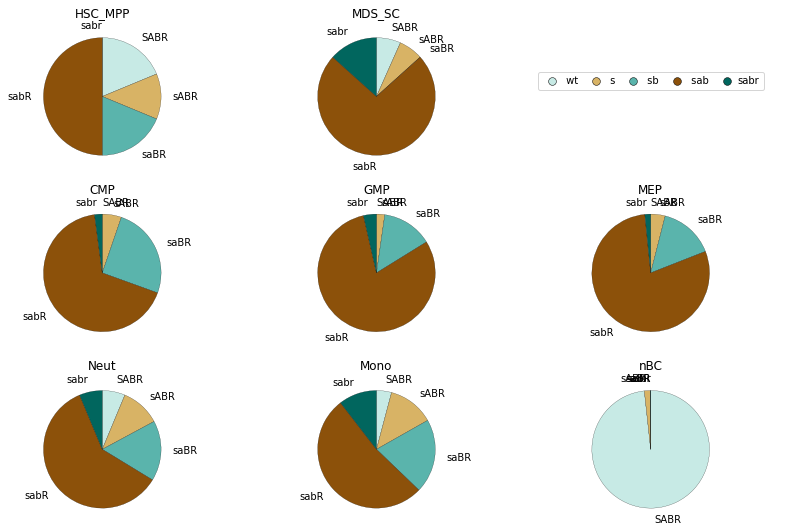

In [8]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#c7eae5', '#d8b365', '#5ab4ac', '#8c510a', '#01665e']
lgdlabels = [' wt', ' s', ' sb', ' sab', 'sabr']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc.columns):
    if count == 2:
        continue
    else:
        labels = cc.index.to_list()
        sizes = cc[ct].to_list()
        wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
        ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
        ax[count].set_title(ct)

ax[2].set_axis_off()    
ax[2].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_permitted_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_permitted_piecharts.png',bbox_inches='tight', dpi = 600)


In [9]:
#Piecharts for figure 2
#Cell counts collapsed to cunts per total number of mutAtions
cc2 = cell_number.copy()

cc2['hap'] = cc2.index.get_level_values(0)

#count the number of lowercase in each haplotype
def n_lower_chars(string):
    return sum(1 for c in string if c.islower())

muts = []
haps = cc2['hap'].to_list()
for h in haps:
    muts.append(n_lower_chars(h))
mut_dict = dict(zip(haps, muts))    

cc2['muts'] = cc2['hap'].replace(mut_dict)
cc2 = cc2.groupby('muts').sum()
cc2.insert(2, 'spacer', 'none')

cc2

celltype,HSC_MPP,MDS_SC,spacer,CMP,GMP,MEP,Neut,Mono,nBC
muts,,,,,,,,,
0,3,1,none,0,0,0,11,15,625
1,6,1,none,6,17,9,57,82,48
2,10,1,none,62,147,56,151,258,4
3,8,13,none,67,252,103,117,217,0
4,0,2,none,2,11,2,11,38,0


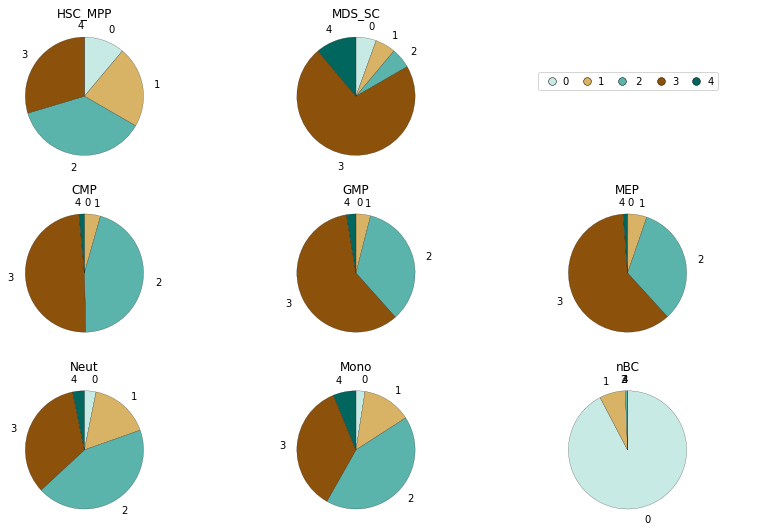

In [10]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#c7eae5', '#d8b365', '#5ab4ac', '#8c510a', '#01665e']
lgdlabels = ['0', '1', ' 2', '3', '4']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc2.columns):
    if count == 2:  #don't try to plot the spacer column
        continue
    else:
        labels = cc2.index.to_list()
        sizes = cc2[ct].to_list()
        wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
        ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
        ax[count].set_title(ct)

ax[2].set_axis_off()    
ax[2].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 5, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_mutno_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_mutno_piecharts.png',bbox_inches='tight', dpi = 600)
